## FINAL REPORT: Predicted Chest Pain Type in Cleveland, Ohio 
(Section 002, Group 31)

## Introduction

**Background:**
    Heart disease is the leading cause of death in the United States, including the city of Cleveland in Ohio. Factors that affect the probability of contracting heart disease include, unhealthy diet, high blood pressure, high cholesterol, minimal physical activity, etc. (“Heart disease,” 2022). While heart disease symptoms depend on the type of heart disease, many common symptoms include chest pain, shortness of breath, and pain in the neck, jaw, and throat. As noted, chest pain is often associated with heart disease. Particularly angina is a chest pain caused by poor blood flow to the heart due to the buildup of thick plaques on the inner walls of the arteries carrying blood to the heart, thereby restricting the heart’s supply of blood (“Chest pain,” 2023). Several genetic and lifestyle factors contribute to the risk of developing angina. For example, there is evidence of a positive relationship between age and developing angina; an increase of plaque build up in the arteries is correlated with an increase in age (“Causes and risk,” n.d.).  

**Question:** Is it possible to predict chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) for a given heart disease patient based on various revelent medical factors and patient information?

**Dataset:** Cleveland Heart Disease Processed Data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. 

## Preliminary & Exploratory Data Analysis

Here, we will read, tidy, summarize, and visualize the dataset. Ultimately in this section, we want to find our variables of interest to use as predictors for our classification model. 

In [2]:
#attach necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
#read data
#add names to columns based on information from website

data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = FALSE)
heart_data <- data |> 
        rename(
            age = X1,
            sex = X2,
            cp = X3,
            restbp = X4,
            chol = X5,
            fbs = X6, 
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14) 
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


We will not use all the variables to answer our research question. Below we will select the specific columns based on our variables of interest to clean and wrangle the data. For instance, some columns are unspecified or don't have enough information on their meaning from the website (`thal`, `oldpeak`, `slope`, `ca`, and `num`), so we will not include them. Some columns are untidy (categorical values are listed numerically, which may be unhelpful when trying to visualize and understand the data), so we will tidy them. 

In [4]:
#clean and wrangle data
#select columns within the dataset corresponding with our selected variables of interest 
#mutate certain rows to change the type of character a variable is listed as 

filter_data <- heart_data|>
    select(cp, age, restbp, chol, thalach, sex, exang)|>
    mutate(cp = as_factor(cp))|>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang))

The columns `cp`, `sex`, and `exang` were all mutated in order to change the type of character the variables were listed as.

In [5]:
#split data into training and testing, with 75% of data as training.
set.seed(2000)

heart_split <- initial_split(filter_data, prop = 0.75, strata=cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Since splitting the data is a randomized process, we used the function `set.seed` to ensure reproducibility. The data has now been split into a training set to train our classifier, and a testing set to test its accuracy. In testing the performance of the classifier on new unseen data, we can ensure that the model is reliable and accurate in predicting chest pain type and can be generalize to new data.

In [6]:
#using training data, summarize data into tables of count, mean values, and median values
count_cp <- heart_train|>
    group_by(cp)|>
    summarize(count = n()) |>
    mutate(percent = 100*count/nrow(heart_train))
count_cp

mean_variables <- heart_train |>
    group_by(cp) |>
    summarize(mean_age=mean(age, na.rm=TRUE),
             mean_restbp=mean(restbp, na.rm=TRUE),
             mean_chol=mean(chol, na.rm=TRUE),
             mean_thalach=mean(thalach, na.rm=TRUE))
mean_variables

median_variables <- heart_train |>
    group_by(cp) |>
    summarize(median_age=median(age, na.rm=TRUE),
             median_restbp=median(restbp, na.rm=TRUE),
             median_chol=median(chol, na.rm=TRUE),
             median_thalach=median(thalach, na.rm=TRUE))
median_variables

cp,count,percent
<fct>,<int>,<dbl>
1,19,8.444444
2,36,16.000000
3,63,28.000000
4,107,47.555556


cp,mean_age,mean_restbp,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,56.52632,140.6316,239.7895,153.8421
2,50.25000,127.7500,235.8333,163.9722
3,54.69841,130.3968,244.4603,155.2063
4,55.25234,132.6636,250.4393,142.0093


cp,median_age,median_restbp,median_chol,median_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,140,234,155
2,51,128,225,165
3,54,130,240,157
4,57,130,248,143


Based on our summary data above, we can interpret some of the relationships and trends between `cp` and the variables of interest. We can see that a majority of our data contains points for `cp` = 4, making asymptomic angina the most common type of angina within our dataset. 

In [7]:
#attach new libraries for visualizing data
library(RColorBrewer)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




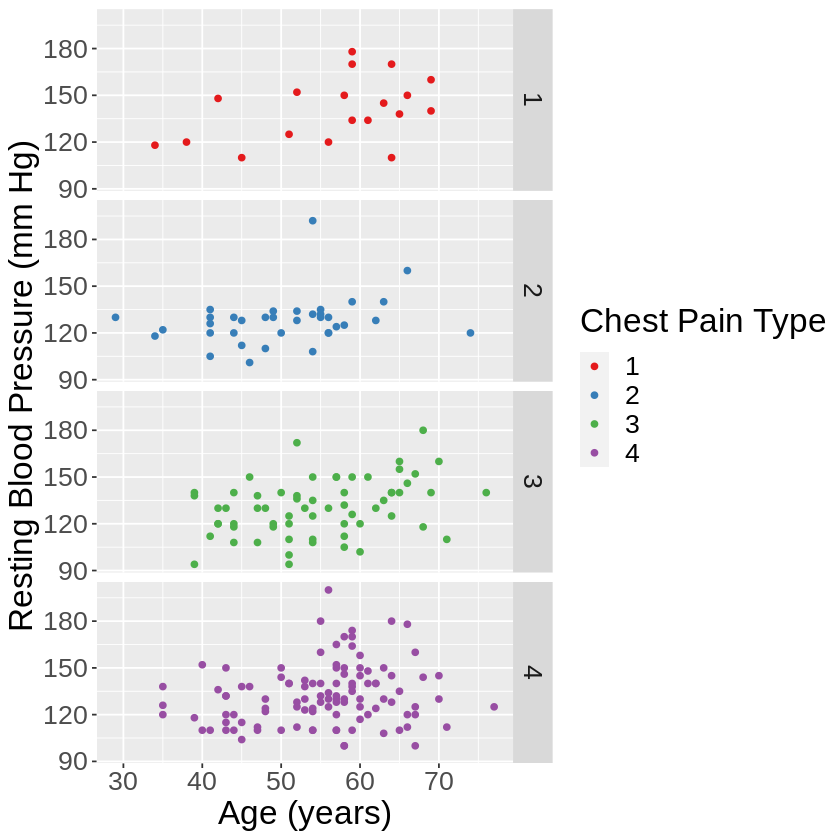

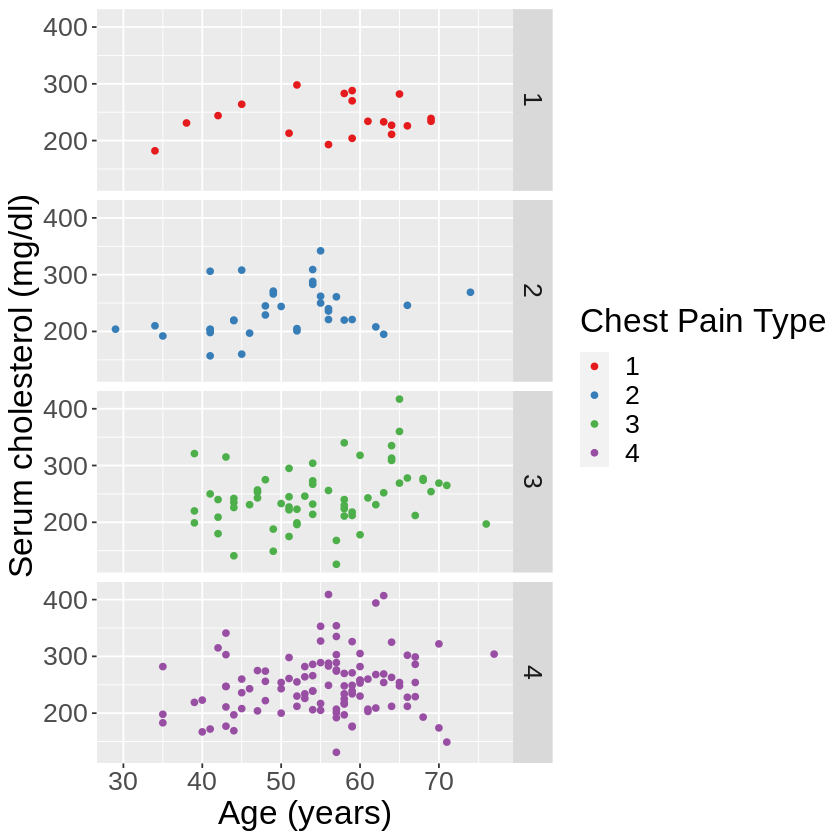

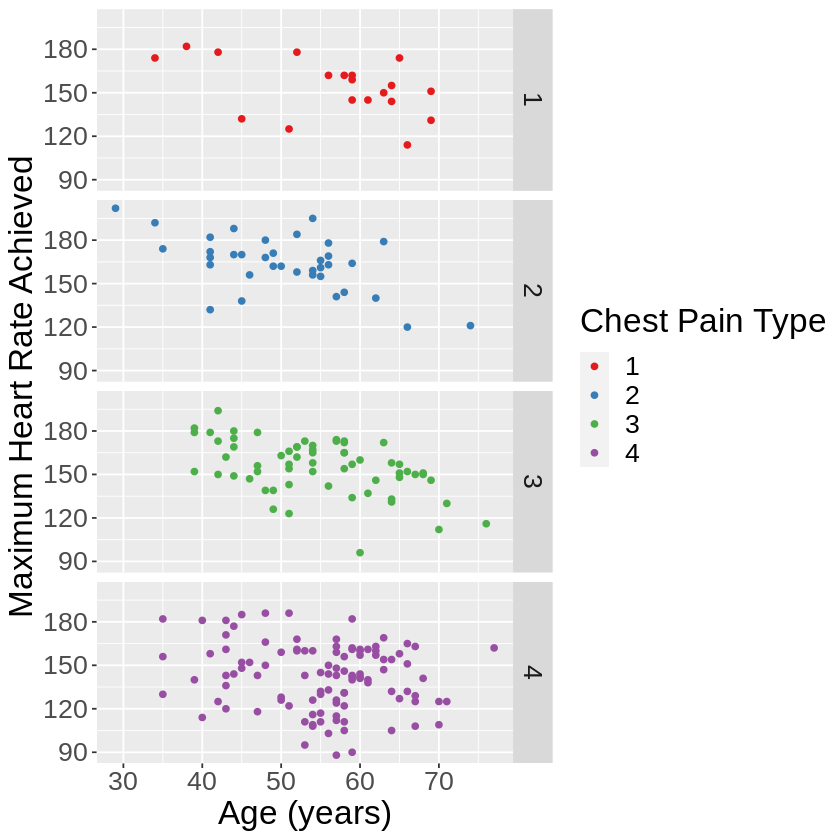

In [8]:
#using training data, visualize numeric predictors against each other to see distribution of data

restbp_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= restbp, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Resting Blood Pressure (mm Hg)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
restbp_plot

chol_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= chol, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
chol_plot

thalach_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= thalach, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Maximum Heart Rate Achieved",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
thalach_plot

As we can see, none of the plots really show a clear, distinct relationship between our target variable chest pain type and the tested predictors. This could be for many possible reasons. We only used numeric predictors - perhaps other predictors, such as sex, could yield a more clear distribution. In testing out the relationship between more variables, we could find a better predictor, or if any variable is a good predictor for chest pain at all. If results contain to produce no relationship then perhaps our target variable may need to be refined and could instead be generalized in predicting simply whether or not there is a heart disease diagnosis based on the chosen predictor variables.

In [10]:
library(GGally)
library(broom)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

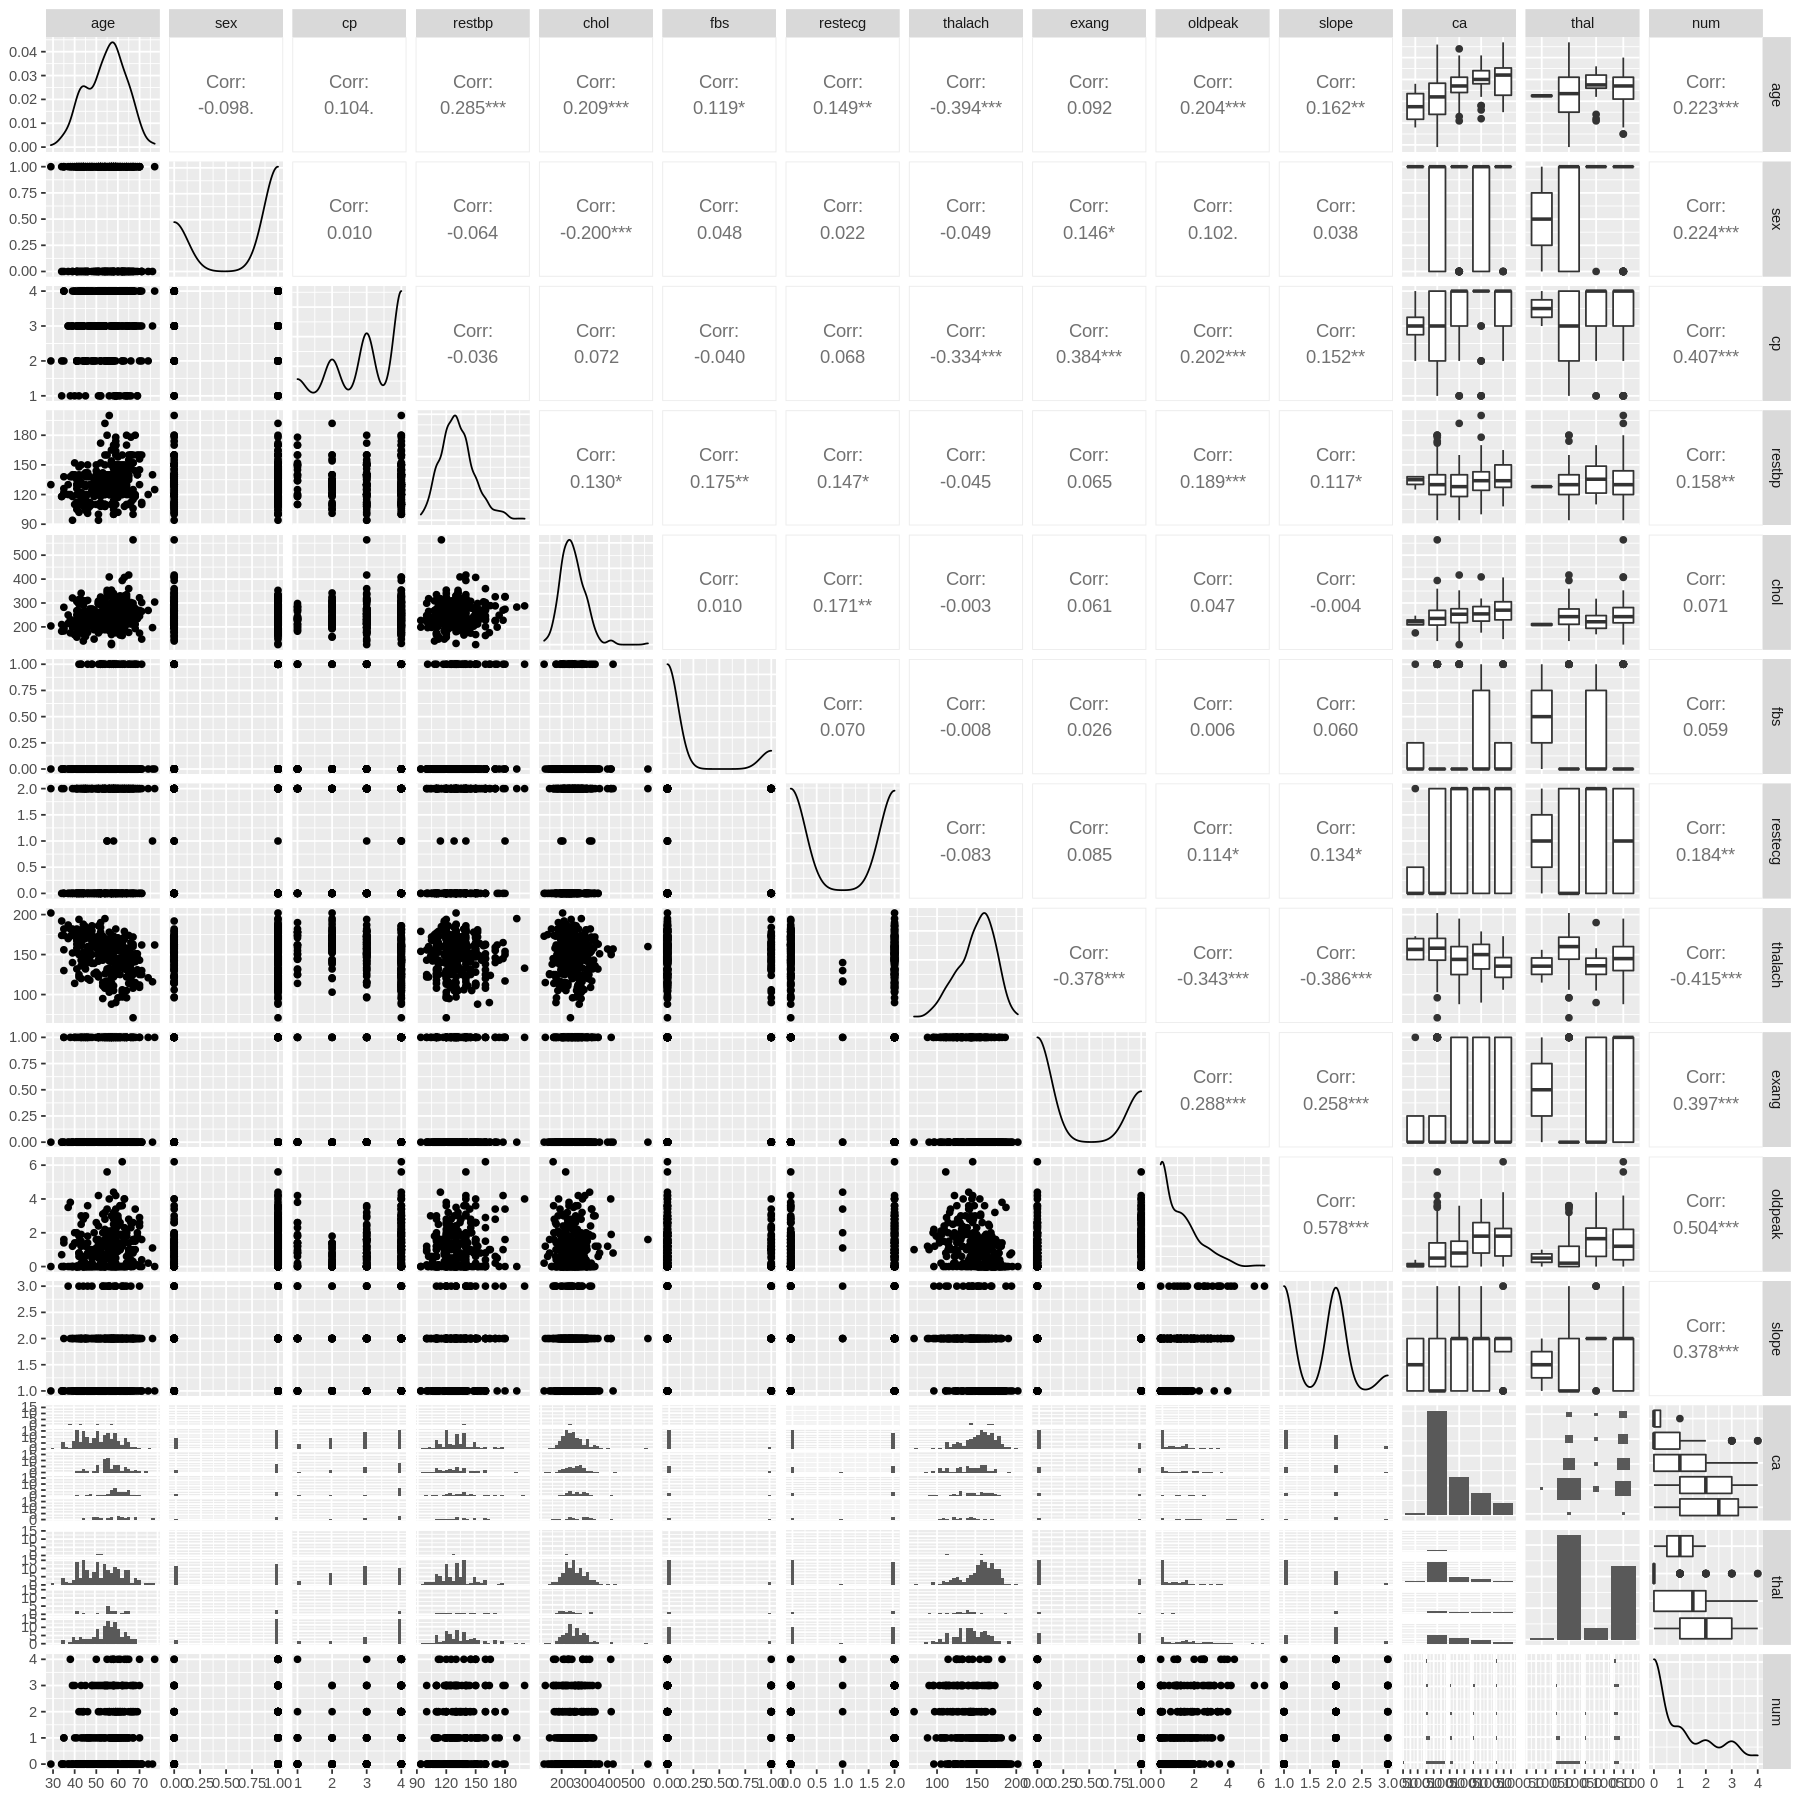

In [13]:
options(repr.plot.height = 15, repr.plot.width = 15)

heart_pairs <- heart_data |>
    select("age":"num") |>
    ggpairs() 
heart_pairs

As we can see from the visualization above of each variable compared against each other, `age` and `thalach` (maximum heart heart) seem to be moderately correlated, while the other plots show very weak or no correlations. Thus, we will use these variables as predictors for our classification model.

## Methods & Results

Now that we have decided to use `age` and `thalach` as the predictors for our classification model, we can move on to our planned data analysis. We will start with creating a recipe, a knn specification model (using the `tune` function to determine what $k$ value to use, and our classifier with the training data set. Then, we will perform a cross-fold validation and test the metrics with $k$ values from 2-20, and plot the data to find our ideal $k$ value.

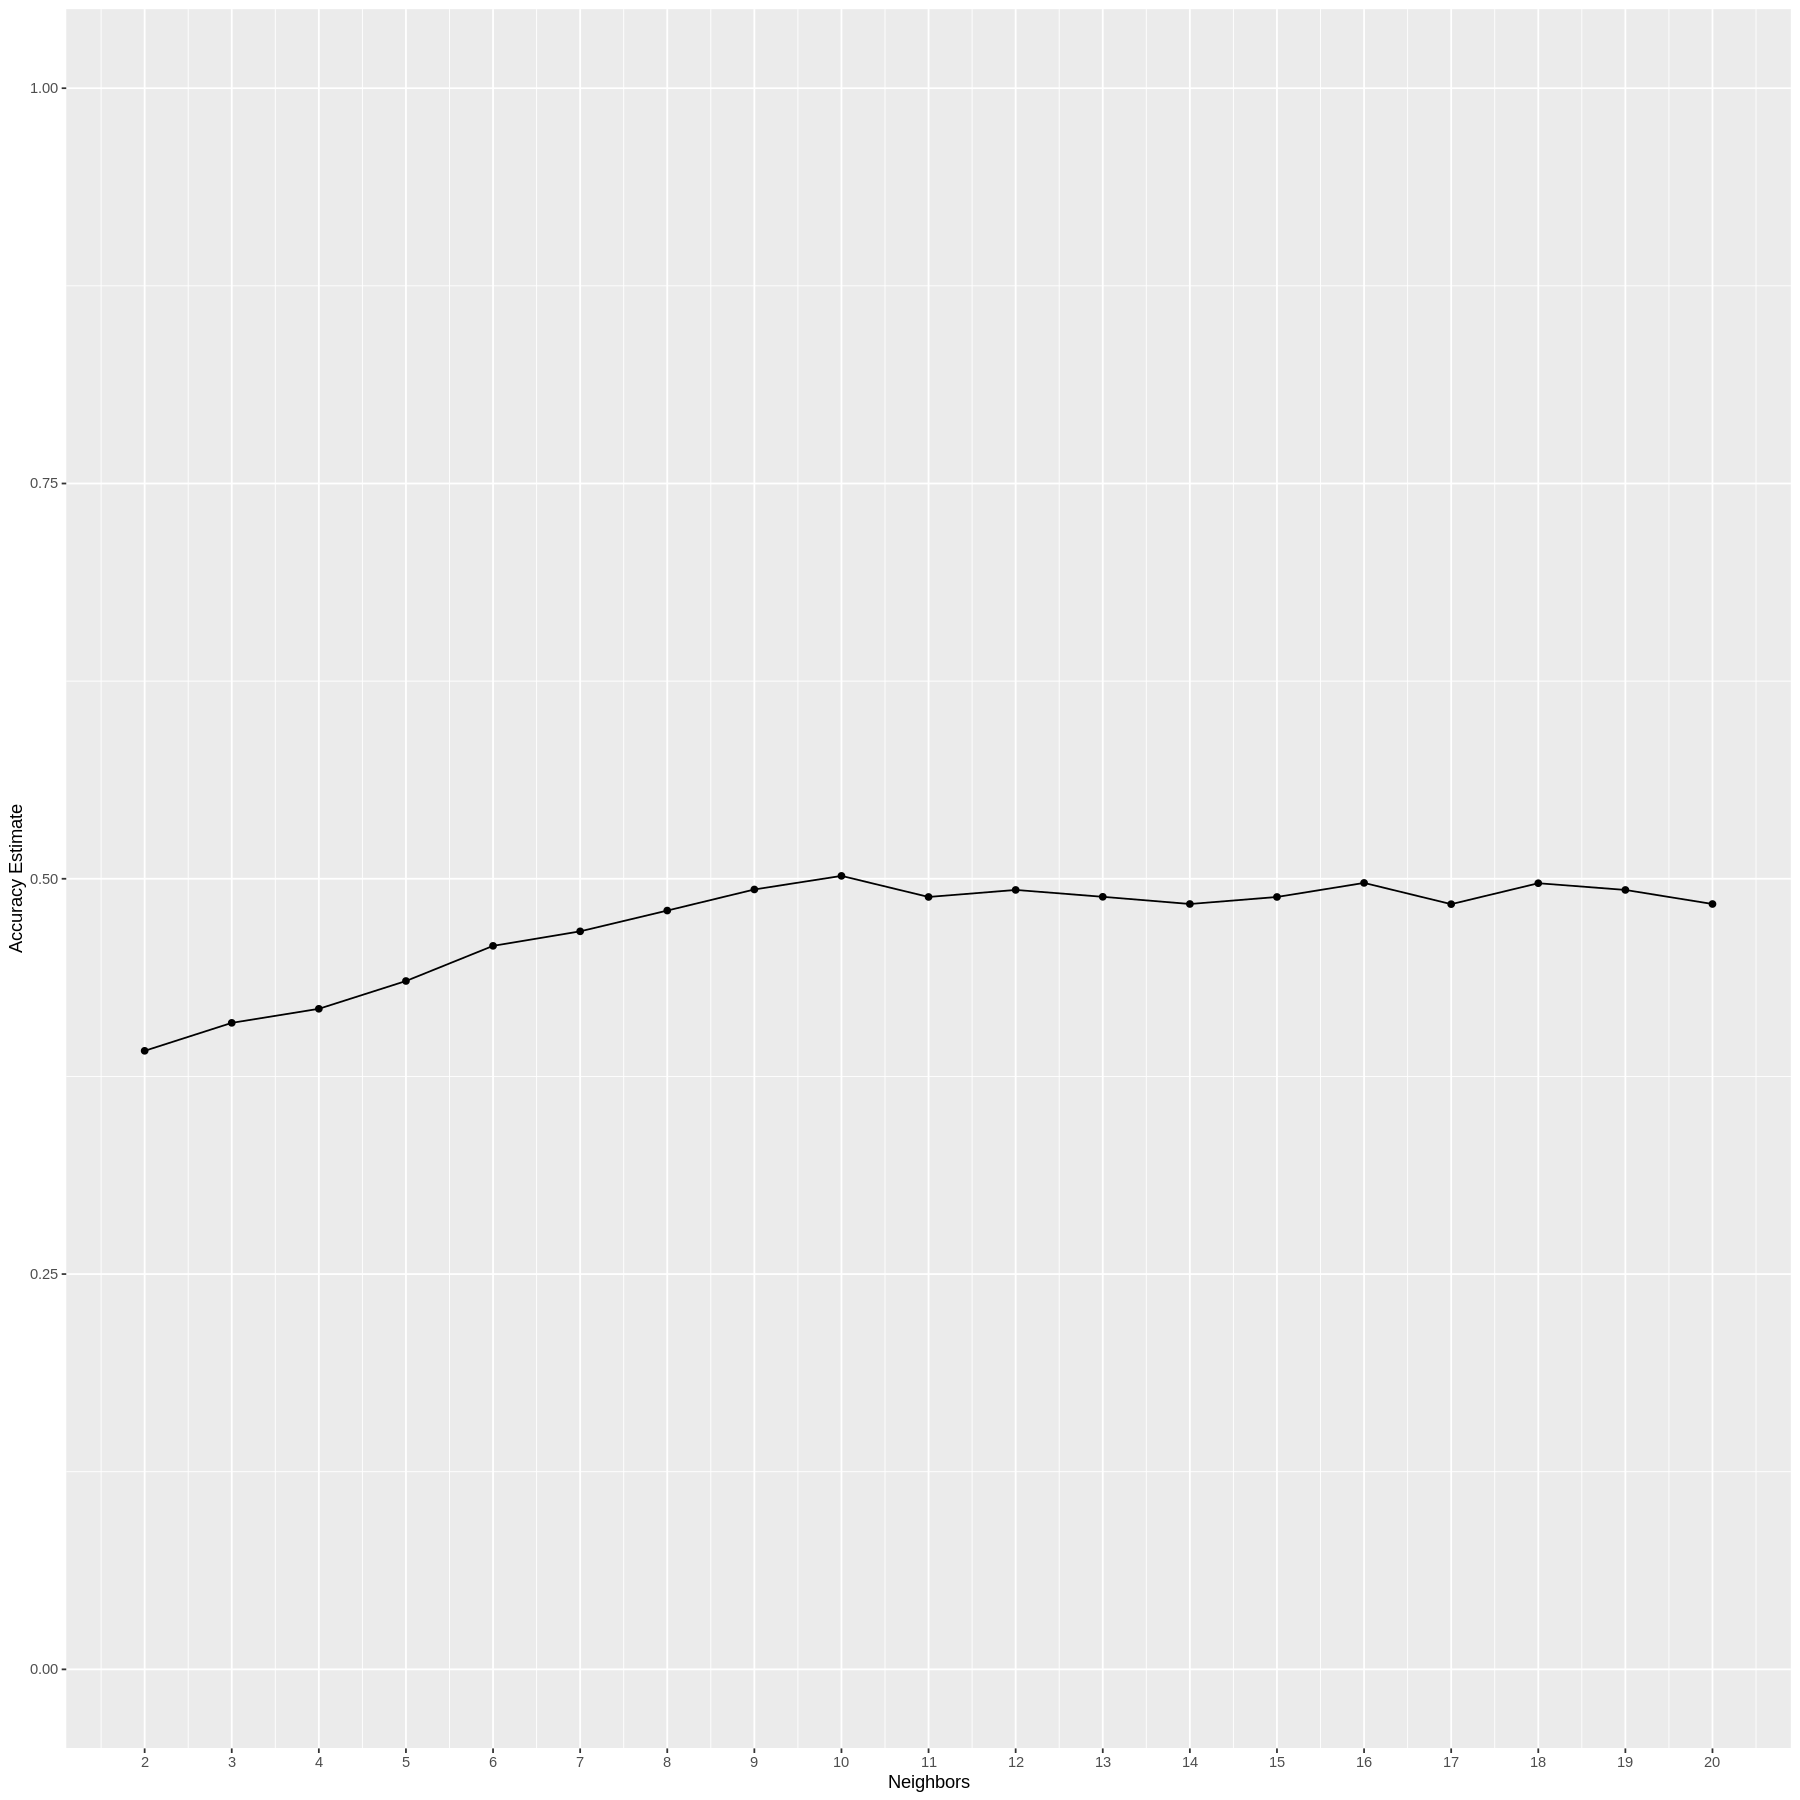

In [23]:
set.seed(1234) 

heart_recipe <- recipe(cp ~ age + thalach, data = heart_train)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = cp)

gridvals <- tibble(neighbors = seq(2, 20, 1))

heart_workflow <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = heart_vfold, grid = gridvals) |>
       collect_metrics()

accuracies <- heart_workflow |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 20, by = 1)) +  
       scale_y_continuous(limits = c(0, 1.0)) 
cross_val_plot

As we can see from the above plot, $k$=10 would be the best possible $k$ value, since its accuracy estimate is the highest among all the values plotted. We will now input that value into a new knn specification model and classifier.

In [27]:
set.seed(9999) 

new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(new_knn_spec) |>
       fit(data = heart_train)

Now that we have our final model, we can predict on the test dataset, and report the accuracy and confusion matrix of this prediction.

In [29]:
heart_predictions <- predict(heart_fit, heart_test) |>
    bind_cols(heart_test)
heart_predictions

heart_metrics <- heart_predictions |>
    metrics(truth = cp, estimate = .pred_class)
heart_metrics

heart_conf_mat <- heart_predictions |>
    conf_mat(truth = cp, estimate = .pred_class)
heart_conf_mat

.pred_class,cp,age,restbp,chol,thalach,sex,exang
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
3,3,37,130,250,187,1,0
2,4,53,140,203,155,1,1
4,2,56,140,294,153,0,0
3,2,44,120,263,173,1,0
4,2,58,120,284,160,1,0
4,4,60,130,206,132,1,1
3,3,50,120,219,158,0,0
3,3,44,130,233,179,1,1
3,4,42,140,226,178,1,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4743590
kap,multiclass,0.1483356


          Truth
Prediction  1  2  3  4
         1  0  0  0  0
         2  1  2  5  1
         3  2  6  8  9
         4  1  6 10 27

## Discussion

criteria:

-summarize what you found

-discuss whether this is what you expected to find?

-discuss what impact could such findings have?

-discuss what future questions could this lead to?

**Our Findings:**

**What we expected to find:**
We wanted to predict the type of chest pain (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) a patient with heart disease/conditions could expect to have based on relevent medical factors and personal information as noted by the variables of interest listed above. Since the graphs in our preliminary analysis did not show a clear distribution of data or a distinct relationship correlated with chest pain type, it was hard to determine what we would expect to find. Thus, we focused on refining our list of chosen predictor variables to determine whether the variables chosen are effective predictors or not. 
Our findings were (expected/not expected).

**Impact of our findings:**
Predicting chest pain type and therefore the severity of the chest pain can provide the physician with the necessary information needed to treat the patient's heart disease. Further data analysis could describe which factor(s), if any, directly lead to a certain chest pain type.

**Future Questions:**
- Is this classification model consistent with data in other parts of the world (eg. Hungary, Switzerland, etc)? 
- What other variables could be used in predicting chest pain that we haven't already accounted for, and if those variables were added, would that increase the estimate accuracy?
- Does there exist any diseases sharing the same predictor variables as chest pain? If so, how can we distinguish between these diseases and chest pain?

## References

Centers for Disease Control and Prevention. (2022, August 12). Heart disease deaths - health, United States. Centers for Disease Control and Prevention. Retrieved March 11, 2023, from https://www.cdc.gov/nchs/hus/topics/heart-disease-deaths.htm#:~:text=Heart%20disease%20has%20been%20the,excessive%20alcohol%20use%20(2)

Mayo Foundation for Medical Education and Research. (2023, March 3). Chest pain. Mayo Clinic. Retrieved March 11, 2023, from https://www.mayoclinic.org/diseases-conditions/chest-pain/symptoms-causes/syc-20370838

U.S. Department of Health and Human Services. (2022, March 24). Causes and risk factors. National Heart Lung and Blood Institute. Retrieved March 11, 2023, from https://www.nhlbi.nih.gov/health/angina/causes
